Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Rea Rustagi"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings

%matplotlib inline


# HW 3:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        xiters: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    
    tol = numpy.finfo(float).eps
    i = 0
    e = x0
    xiters = [e]
    
    while (e > tol and i < N):
        x = g(x0)
        e = numpy.abs(x - x0)
        x0 = x
        xiters.append(x0)
        i += 1
    
    
    return xiters

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979,
                      0.79348036, 0.70136877])
x_true = 0.7390851332153119

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success!')

success!


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

Step A: Check if $x=\sqrt{M}$ is a fixed point of $g(x)$:
$$
g(\sqrt{M}) = 1 + \sqrt{M} - \frac{M}{M} = 1 + \sqrt{M} - 1 = \sqrt{M}
$$
We confirm that $x=\sqrt{M}$ is a fixed point. $\newline$
Step B: Analyze convergence behavior
$$ 
|g'(x*=\sqrt{M})| = |1 - \frac{2*\sqrt{M}}{M}| = |1 - \frac{2}{\sqrt{M}}|
$$
If $|1 - \frac{2}{\sqrt{M}}| < 1$, then the scheme will converge. The scheme will converge for all positive roots of M and diverge for all negative roots of M. 

Text(0.5, 1.0, 'N (# of iterations) vs. Relative Error')

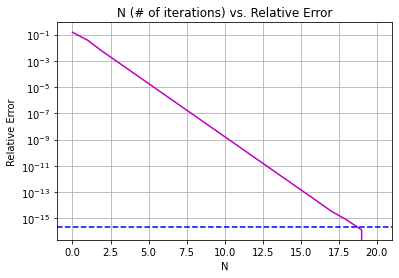

In [5]:
M = 3
x0 = 2
g = lambda x: 1 + x - (x**2) / M

x = fixed_point(g, x0, 30)
rel = numpy.abs((numpy.sqrt(3) - x) / numpy.sqrt(3))

plt.semilogy(range(len(x)), rel, '-m')
plt.axhline(y=numpy.finfo(float).eps, color='b', linestyle='--')
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title("N (# of iterations) vs. Relative Error")

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

Step A: Check if $x=\sqrt{M}$ is a fixed point of $g(x)$:
$$
g(\sqrt{M}) = \frac{M}{\sqrt{M}} = \sqrt{M}
$$
We confirm that $x=\sqrt{M}$ is a fixed point. $\newline$
Step B: Analyze convergence behavior
$$ 
|g'(x*=\sqrt{M})| = |-\frac{M}{M}| = |-1| = 1
$$
The scheme will not converge because $|g'(x*=\sqrt{M})|=1$.

Text(0.5, 1.0, 'N (# of iterations) vs. Relative Error')

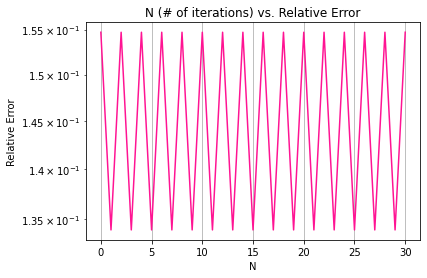

In [6]:
M = 3
x0 = 2
g = lambda x: M / x

x = fixed_point(g, x0, 30)
rel = numpy.abs((numpy.sqrt(3) - x) / numpy.sqrt(3))

plt.semilogy(range(len(x)), rel, color='deeppink', linestyle='-')
#plt.axhline(y=numpy.finfo(float).eps, color='r', linestyle='--')
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title("N (# of iterations) vs. Relative Error")

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f'}$$

with $$ f = x^2 - M$$

Step A: Check if $x=\sqrt{M}$ is a fixed point of $g(x)$:
$$
g(\sqrt{M}) = \sqrt{M} - \frac{M - M}{2*\sqrt{M}} = \sqrt{M}
$$
We confirm that $x=\sqrt{M}$ is a fixed point. $\newline$
Step B: Analyze convergence behavior
$$ 
|g'(x*=\sqrt{M})| = 1 - \frac{2M+2M}{4M} = 0
$$
The scheme will always converge because $|g'(x*=\sqrt{M})|=0$.

Text(0.5, 1.0, 'N (# of iterations) vs. Relative Error')

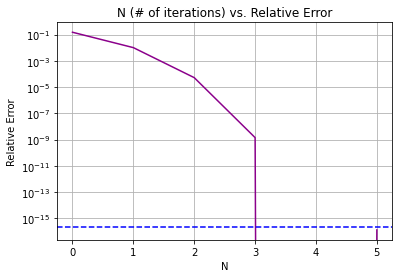

In [7]:
M = 3
x0 = 2
g = lambda x: x - (x**2 - M) / (2 * x)

x = fixed_point(g, x0, 30)
rel = numpy.abs((numpy.sqrt(3) - x) / numpy.sqrt(3))

plt.semilogy(range(len(x)), rel, color='darkmagenta', linestyle='-')
plt.axhline(y=numpy.finfo(float).eps, color='b', linestyle='--')
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title("N (# of iterations) vs. Relative Error")

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [8]:
#  Cell to import and test at least newton's method from class

import rootfinding_optimization_schemes as rtfind

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = rtfind.newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles

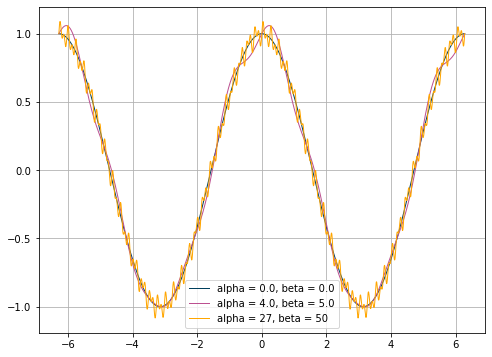

In [9]:
amp = 0.05
alpha = [0., 4., 27]
beta = [0., 5., 50]
colors = ['#003f5c', '#bc5090', '#ffa600']
lab = 'alpha = {}, beta = {}'
x = numpy.linspace(-2* numpy.pi, 2*numpy.pi, 2000)

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)

for a, b, col in zip(alpha, beta, colors):
    axes.plot(x, numpy.cos(x) + amp * (numpy.sin(a * x)+ numpy.sin(b * x)), color = col, label=lab.format(a, b), linewidth=1)

axes.grid(True)
axes.legend()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [22]:
from scipy import optimize

amp = 0.05
params = [ (0., 0.), (4., 5.),  (27, 50.) ]
tol = numpy.finfo(float).eps

# Bisection Method
print('BISECTION')
for pair in params:
    fn = lambda x: numpy.cos(x) + amp * (numpy.sin(pair[0] * x) + numpy.sin(pair[1] * x))
    x0 = 0.2
    x1 = 2.
    xstar, xarray = rtfind.bisection(fn, x0, x1)
    print('[a, b] = {} | root at x = {}, f(x*) = {}, in {} steps'.format(pair, xstar, fn(xstar), len(xarray)))

print("")
print('NEWTON')
for pair in params:
    fn = lambda x: numpy.cos(x) + amp * (numpy.sin(pair[0] * x) + numpy.sin(pair[1] * x))
    fn_prime = lambda x: -numpy.sin(x) + amp * (pair[0] * numpy.cos(pair[0] * x) + pair[1] * numpy.cos(pair[1] * x))
    x0 = 0.2
    xstar, xarray = rtfind.newton(fn, fn_prime, x0)
    print('[a, b] = {} | root at x = {}, f(x*) = {}, in {} steps'.format(pair, xstar, fn(xstar), len(xarray)))

print("")
print('SECANT')
for pair in params:
    fn = lambda x: numpy.cos(x) + amp * (numpy.sin(pair[0] * x) + numpy.sin(pair[1] * x))
    x0 = 0.2
    x1 = 2.
    xstar, xarray = rtfind.secant(fn, x0, x1)
    print('[a, b] = {} | root at x = {}, f(x*) = {}, in {} steps'.format(pair, xstar, fn(xstar), len(xarray)))    

print("")
print('BRENTQ')
for pair in params:
    fn = lambda x: numpy.cos(x) + amp * (numpy.sin(pair[0] * x) + numpy.sin(pair[1] * x))
    x0 = 0.2
    x1 = 2.
    xstar, rootres = optimize.brentq(f, x0, x1, full_output = True)
    print('[a, b] = {} | root at x = {}, f(x*) = {}, in {} steps'.format(pair, xstar, fn(xstar), rootres.iterations))
    
print("")
print('RIDDER')
for pair in params:
    fn = lambda x: numpy.cos(x) + amp * (numpy.sin(pair[0] * x) + numpy.sin(pair[1] * x))
    x0 = 0.2
    x1 = 2.
    rootres = optimize.root_scalar(f, bracket = [x0, x1], method = 'ridder')
    print('[a, b] = {} | root at x = {}, f(x*) = {}, in {} steps'.format(pair, rootres.root, fn(rootres.root), rootres.iterations))

BISECTION
[a, b] = (0.0, 0.0) | root at x = 1.570796775817871, f(x*) = -4.490229742968679e-07, in 20 steps
[a, b] = (4.0, 5.0) | root at x = 1.6304405212402344, f(x*) = 1.9620940002601506e-07, in 18 steps
[a, b] = (27, 50.0) | root at x = 1.5567201137542725, f(x*) = -3.49143903736332e-08, in 22 steps

NEWTON
[a, b] = (0.0, 0.0) | root at x = 4.71238898038469, f(x*) = -1.8369701987210297e-16, in 5 steps
[a, b] = (4.0, 5.0) | root at x = -14.096326236971352, f(x*) = 6.931560738582254e-08, in 5 steps
[a, b] = (27, 50.0) | root at x = 1.556720103515459, f(x*) = -3.413055948975341e-11, in 138 steps

SECANT
[a, b] = (0.0, 0.0) | root at x = 1.5707963267998242, f(x*) = -4.927552640156338e-12, in 6 steps
[a, b] = (4.0, 5.0) | root at x = 1.6304406749277849, f(x*) = 6.13728728740548e-08, in 7 steps
[a, b] = (27, 50.0) | root at x = 1.5567201023472799, f(x*) = 3.9454700583030355e-09, in 9 steps

BRENTQ
[a, b] = (0.0, 0.0) | root at x = 1.2746447281532984, f(x*) = 0.2918415091408924, in 19 steps


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

Text(0.5, 1.0, 'N vs. Relative Error for a = 0., b = 0.')

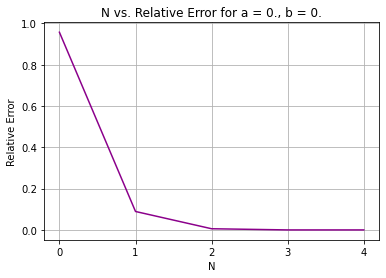

In [12]:
import math

all_xarrays = [None] * 3
for pair, i in zip(params, range(3)):
    fn = lambda x: numpy.cos(x) + amp * (numpy.sin(pair[0] * x) + numpy.sin(pair[1] * x))
    fn_prime = lambda x: -numpy.sin(x) + amp * (pair[0] * numpy.cos(pair[0] * x) + pair[1] * numpy.cos(pair[1] * x))
    x0 = 0.2
    xstar, xarray = rtfind.newton(fn, fn_prime, x0)
    all_xarrays[i] = xarray.tolist()
    
# Each set of parameters produces a different root of the function, so I will graph the rel error closest
# to the real mathematical root of the Newton root

# [0, 0] params closest math root = (3/2)*pi

rel_error1 = [ abs((1.5 * math.pi - x)/(1.5 * math.pi)) for x in all_xarrays[0]]
x = list(range(len(all_xarrays[0])))

plt.plot(x, rel_error1, color='darkmagenta', linestyle='-')
plt.xticks(numpy.arange(0, 5, 1.0))
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('N vs. Relative Error for a = 0., b = 0.')

Text(0.5, 1.0, 'N vs. Relative Error for a = 4., b = 5.')

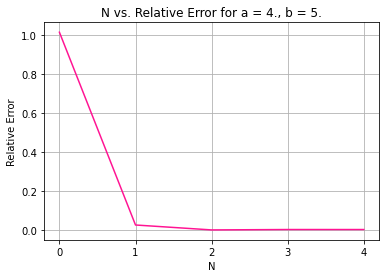

In [13]:
# [4., 5.] params closest math root = (-9/2)*pi

rel_error2 = [ abs((-4.5 * math.pi - x)/(-4.5 * math.pi)) for x in all_xarrays[1]]
x = list(range(len(all_xarrays[1])))

plt.plot(x, rel_error2, color='deeppink', linestyle='-')
plt.xticks(numpy.arange(0, 5, 1.0))
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('N vs. Relative Error for a = 4., b = 5.')

Text(0.5, 1.0, 'N vs. Relative Error for a = 27, b = 50')

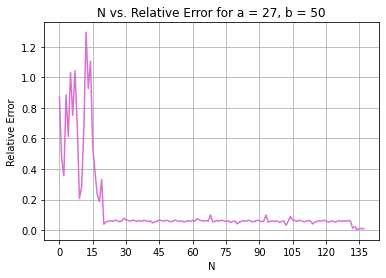

In [14]:
# [27, 50] params closest math root = (1/2)*pi

rel_error3 = [ abs((0.5 * math.pi - x)/(0.5 * math.pi)) for x in all_xarrays[2]]
x = list(range(len(all_xarrays[2])))

plt.plot(x, rel_error3, color='orchid', linestyle='-')
plt.xticks(numpy.arange(0, 138, 15))
plt.grid(True)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('N vs. Relative Error for a = 27, b = 50')

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

All of the methods except for the Newton method return a root close to $\frac{\pi}{2}$, which makes sense because they are fed both an x0 and x1. In the Newton method, for the first two pairs of parameters the method converges quickly, but in the last pair where $\alpha = 27$ and $\beta = 50$, which is the noisiest, the method takes much longer to converge and the relative error is all over the place before about step 20. All methods tested find roots within a reasonable number of steps, although it is unclear why with these inputs the Newton method does not always find the same root as the others. 

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [15]:
def newtsafe(f, f_prime, a, b, tol = 1.e-6, max_steps=1000):
    """ uses a combination of Newton and Bisection methods to return a root within a bracket [a,b]
        
    
    Parameters:
    -----------
    
    f: function (float)
        function giving f(x)
    f_prime:  function (float)
        function giving derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """

    MAX_STEPS = max_steps
    
    f_a = f(a)
    f_b = f(b)
    
    n_newt, n_bisection = 0, 0
    
    # check bracket
    if (numpy.sign(f_a) == numpy.sign(f_b)):
        raise ValueError('Notice f(a) and f(b) are of the same sign. Try a new bracket.')
    
    for k in range(1, MAX_STEPS + 1):
        
        c = (a + b) / 2
        test = c - (f(c) / f_prime(c))
        
        if (test > a and test < b): # Newton
            x = test
            n_newt += 1
        else:                       # Bisection if guess is outside brackets
            x = (a + b) / 2
            n_bisection += 1
            
        if numpy.abs(f(x)) < tol:
            break
            
        if f(a)*f(x) < 0: # if f(a) and f(x) are of opposite signs, bring b closer
            b = x
        else:
            a = x         # if f(a) and f(x) are of the same signs, bring a closer
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return x, n_newt, n_bisection

In [16]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.2719484652642392,    N_n = 5, N_b = 4
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884988437570216,    N_n = 9, N_b = 11
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106139446690784,    N_n = 10, N_b = 9
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590967936258,    N_n = 6, N_b = 5
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.147317576688644,    N_n = 9, N_b = 9
brentq   = 1.1473182519138232,    N   = 9

Notice f(a) and f(b) are of the same sign. Try a new bra

## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


Using Stirling's approximation and taking the log of both sides, we can write the relative error relation as:
$$
(n+1)[log(x)-log(n+1)+1] = log(\epsilon)
$$
We can then further simplify algebraically to get:
$$
\frac{n+1}{\epsilon^{n+1}} = e*x (ii)
$$
For the purposes of writing a function, we can write the first relation as
$$
f(x,n) = (n+1)[log(x)-log(n+1)+1] - log(\epsilon)
$$
We will optimize this function to find n for each input. I chose to use the BRENTQ function from scipy.optimize.

In [17]:
from tabulate import tabulate

inputs = [0.1, 1., 10., 100., 709., 1000.]
eps = numpy.finfo(float).eps
f_stirl = lambda n, x: (n + 1) * (numpy.log(x) - numpy.log(n + 1) + 1) - numpy.log(eps)

results = [[],[],[],[],[],[]]

for i, j in zip(inputs, range(6)):
    est = i * numpy.exp(1)
    b = est + 50
    
    n_stirl, rootres = optimize.brentq(f_stirl, 1, b, full_output=True, args = i)
    rel_err = abs((n_stirl - est) / (n_stirl))
    
    results[j].append(i)
    results[j].append(n_stirl)
    results[j].append(numpy.exp(1) * i)
    results[j].append(rel_err)

print(tabulate(results, headers=['x', 'N (Stirling)', 'N (e*x)', 'Relative Error'], tablefmt="presto"))

      x |   N (Stirling) |     N (e*x) |   Relative Error
--------+----------------+-------------+------------------
    0.1 |        8.99825 |    0.271828 |        0.969791
    1   |       17.6933  |    2.71828  |        0.846366
   10   |       52.392   |   27.1828   |        0.481165
  100   |      304.829   |  271.828    |        0.10826
  709   |     1961.98    | 1927.26     |        0.0176938
 1000   |     2753.09    | 2718.28     |        0.0126435


The estimation $e*x$ is actually quite effective in determining the minimum steps necessary to achieve $\epsilon_{mach}$ precision. We can see that for increasing values of x, the relative error between the Stirling approximation and the $e*x$ approximation approaches 0. 